In [ ]:
import pandas as pd

df = pd.read_csv("crop_recommendation2_cleaned.csv")
df.head()


,n,p,k,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
X = df.drop("label", axis=1)
y = df["label"]


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9954128440366973


In [ ]:
#1. Cross-Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Mean Accuracy:", scores.mean())
print("Std Dev:", scores.std())


Mean Accuracy: 0.9935737635769272
Std Dev: 0.002679098704752941


<Axes: xlabel='Feature'>

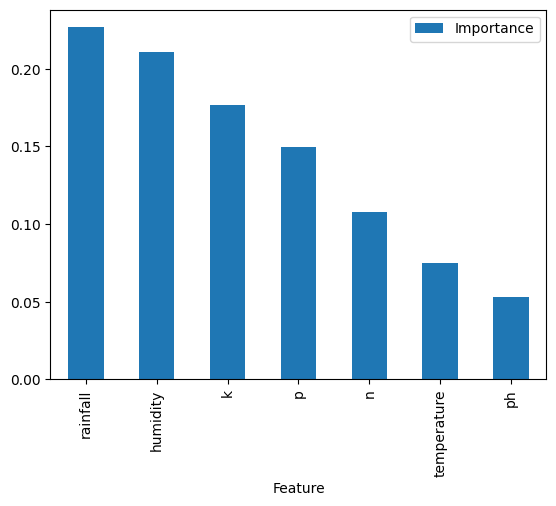

In [ ]:
#Feature importance
import pandas as pd

importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance
importance.plot(kind="bar", x="Feature", y="Importance")


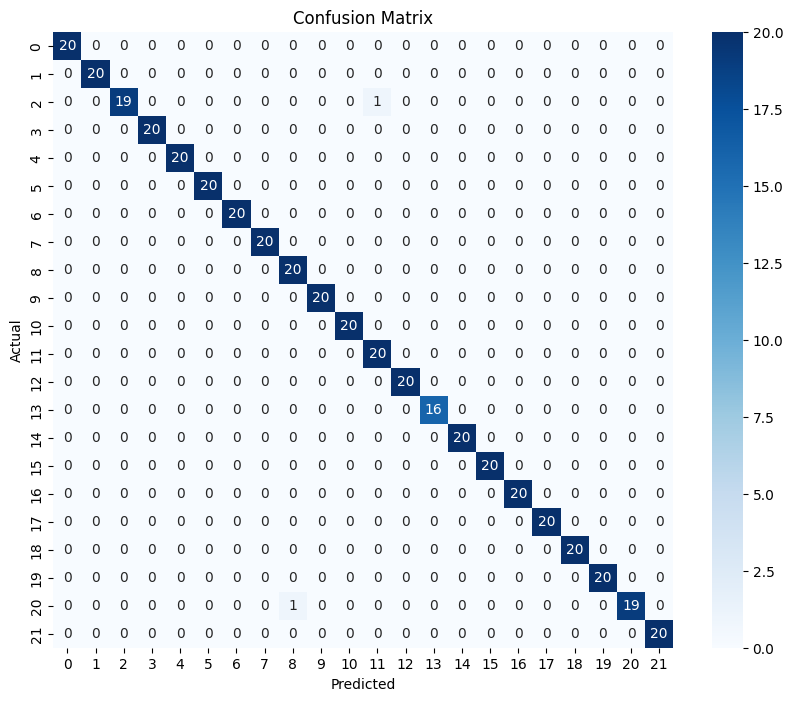

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])